In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
csv_data = pd.read_csv('database.csv')
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,8,4.218388,0.569705,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,8,4.039544,0.570289,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,25,12.329679,0.693612,5.047263,1.000000,0.000000,0.000000,1.000000,0
3,11,10.854882,0.636443,4.867941,1.000000,0.000000,0.000000,1.000000,0
4,12,8.830020,0.597029,4.548500,1.000000,0.000000,0.000000,1.000000,0
5,11,10.374794,0.628511,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,12,18.659241,0.698403,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,8,4.420097,0.619308,3.611114,1.000000,0.000000,0.000000,1.000000,0
8,7,5.418079,0.665277,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,7,4.433054,0.628771,3.631465,1.000000,0.000000,0.000000,1.000000,0


In [3]:
#適用for迴圈
def preprocess(csv_data):
    # 不做normalization  因為新資料會沒有根據可以正規化
    pass
    return csv_data

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Imputer
from sklearn.pipeline import make_pipeline


k_fold = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)  #分层抽样（stratified sampling）来生成数据
#k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=5,oob_score=True,random_state=42)
pipeline = make_pipeline(Imputer(), model)

Features = csv_data.drop('label',axis=1)             #不丟到任何特徵準確度為86
Features = csv_data.drop('HG_val',axis=1)             #提高到99....
Label = csv_data['label']

accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Features,Label):
    #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    X_preprocess = preprocess(X)
    trained = pipeline.fit(X_preprocess, y)   
    #testing
    X_test = Features.loc[test_index]
    X_test_preprocess = preprocess(X_test)
    y_test = Label.loc[test_index]   
    
    accuracies.append(trained.score(X_test_preprocess, y_test))
    y_pred = model.predict(X_test_preprocess)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

print(model.oob_score_)
accuracies  #五個模型的準確度


C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0.99747668327584


[0.9974450689831375,
 0.9982115482881962,
 0.9978277536417072,
 0.9956555072834142,
 0.9971888576539739]

In [23]:
print("平均值 = {:f}".format(np.average(accuracies)))              
print("標準差 = {:f}".format(np.std(accuracies)))                  

平均值 = 0.997266
標準差 = 0.000877


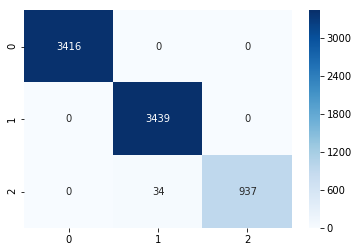

In [24]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

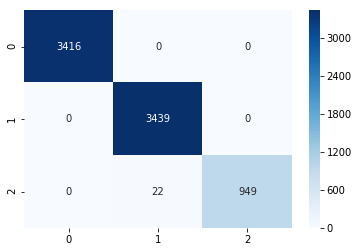

In [25]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

In [26]:
#抱存數據
import pickle
RF_model = model
#保存Model(注:save文件夹要预先建立，否则会报错)
with open('save/RF_model.pickle', 'wb') as f:
    pickle.dump(RF_model, f)
